# Logistic Regression

In [1]:
# need library
import numpy as np
import tensorflow as tf
# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None
# 딥러닝 구동에 필요한 케라스 함수
from keras.models import Sequential
from keras.layers import Dense   

Using TensorFlow backend.


In [3]:
import tensorflow as tf
import numpy as np

data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

w = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

# sigmoid function
y = 1 / (1 + np.e**(-w * x_data + b))

# loss function
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1 - np.array(y_data)) * tf.log(1 - y))

learning_rate = 0.5
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_descent)
        if i % 3000 == 0:
            print("Epoch: %.f, loss = %.4f, w = %.4f, b = %.4f" % (i, sess.run(loss), sess.run(w), sess.run(b)))

Epoch: 0, loss = 4.4835, w = 2.3946, b = -0.8820
Epoch: 3000, loss = 0.0269, w = 2.3377, b = 16.2060
Epoch: 6000, loss = 0.0152, w = 2.9209, b = 20.2966
Epoch: 9000, loss = 0.0106, w = 3.2916, b = 22.8947
Epoch: 12000, loss = 0.0081, w = 3.5636, b = 24.8002
Epoch: 15000, loss = 0.0065, w = 3.7783, b = 26.3041
Epoch: 18000, loss = 0.0055, w = 3.9556, b = 27.5458
Epoch: 21000, loss = 0.0047, w = 4.1066, b = 28.6028
Epoch: 24000, loss = 0.0041, w = 4.2380, b = 29.5227
Epoch: 27000, loss = 0.0037, w = 4.3543, b = 30.3370
Epoch: 30000, loss = 0.0033, w = 4.4585, b = 31.0672
Epoch: 33000, loss = 0.0030, w = 4.5531, b = 31.7291
Epoch: 36000, loss = 0.0028, w = 4.6395, b = 32.3343
Epoch: 39000, loss = 0.0026, w = 4.7191, b = 32.8918
Epoch: 42000, loss = 0.0024, w = 4.7929, b = 33.4084
Epoch: 45000, loss = 0.0022, w = 4.8617, b = 33.8898
Epoch: 48000, loss = 0.0021, w = 4.9261, b = 34.3404
Epoch: 51000, loss = 0.0020, w = 4.9865, b = 34.7639
Epoch: 54000, loss = 0.0019, w = 5.0436, b = 35.1634


## Multiple case

In [10]:
import tensorflow as tf
import numpy as np

x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)

# placeholder : 입력값을 담는 일종의 그릇
X = tf.placeholder(tf.float64, shape=[None,2])
Y = tf.placeholder(tf.float64, shape=[None,1])

w = tf.Variable(tf.random_uniform([2,1], dtype=tf.float64)) # [2,1] : 들어오는 값은 2개, 나가는 값은 1개
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64))

# sigmoid function
y = tf.sigmoid(tf.matmul(X, w) + b) # matmul : 행렬곱

loss = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1 - y))

learning_rate = 0.1
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted = tf.cast(y > 0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

# learning and predict
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3001):
        w_, b_, loss_, _ = sess.run([w, b, loss, gradient_descent], feed_dict = {X : x_data, Y : y_data})
        if (i + 1) % 300 == 0:
            print("step=%d, w1=%.4f, w2=%.4f, b=%.4f, loss=%.4f" % (i + 1, w_[0], w_[1], b_, loss_))
    # 실제값 적용
    new_x = np.array([7,6]).reshape(1,2)
    new_y = sess.run(y, feed_dict={X : new_x})
    print("공부한 시간: %d, 과외 수업 횟수: %d" % (new_x[:,0], new_x[:,1]))
    print("합격 가능성: %6.2f %%" % (new_y*100))        

step=300, w1=0.8126, w2=-0.5719, b=-2.3104, loss=0.2743
step=600, w1=0.8237, w2=-0.3100, b=-3.8153, loss=0.1951
step=900, w1=0.7371, w2=0.0160, b=-4.8968, loss=0.1520
step=1200, w1=0.6347, w2=0.3229, b=-5.7496, loss=0.1242
step=1500, w1=0.5361, w2=0.5971, b=-6.4554, loss=0.1047
step=1800, w1=0.4466, w2=0.8391, b=-7.0581, loss=0.0903
step=2100, w1=0.3670, w2=1.0529, b=-7.5841, loss=0.0794
step=2400, w1=0.2965, w2=1.2427, b=-8.0509, loss=0.0707
step=2700, w1=0.2340, w2=1.4121, b=-8.4706, loss=0.0637
step=3000, w1=0.1784, w2=1.5646, b=-8.8519, loss=0.0580
공부한 시간: 7, 과외 수업 횟수: 6
합격 가능성:  85.63 %


## Sigmoid function

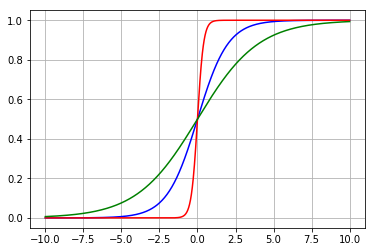

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sig5(x):
    return 1 / (1 + np.exp(-5*x))
def sig05(x):
    return 1 / (1 + np.exp(-0.5*x))

X = np.linspace(-10,10,1001)
sig_Y = sigmoid(X)
sig_5Y = sig5(X)
sig_05Y = sig05(X)

plt.plot(X, sig_Y, color='b')
plt.plot(X, sig_5Y, color='r')
plt.plot(X, sig_05Y, color='g')
plt.grid()
plt.show()

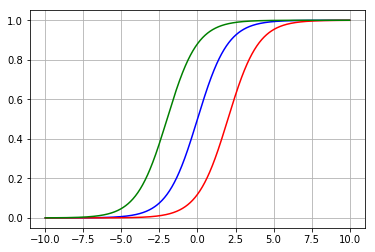

In [16]:
def sig_shift(x, b):
    return 1 / (1 + np.exp(-(x - b)))

sig_shift2_Y = sig_shift(X, 2)
sig_shift2__Y = sig_shift(X, -2)

plt.plot(X, sig_Y, color='b')
plt.plot(X, sig_shift2_Y, color='r')
plt.plot(X, sig_shift2__Y, color='g')
plt.grid()
plt.show()

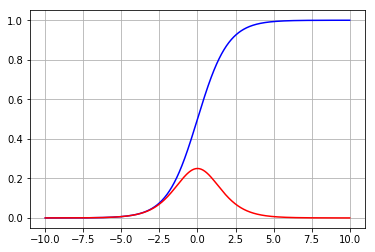

In [17]:
# sigmoid 함수의 미분
def derivative_sigmoid(x): 
    return sigmoid(x) * (1-sigmoid(x))

derivative_Y = derivative_sigmoid(X)

plt.plot(X, sig_Y, color='b')
plt.plot(X, derivative_Y, color='r')
plt.grid()
plt.show()